In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [32]:
# Load the data
path="D:/alon_/Research/POSTGRAD/PhD/CODE/Adrian's Code/NETWORK_sims_2/Saved Networks/Simulations Only/Python Data/"

filename = path + 'Testing Simulation_2_ForPython.mat'
# filename = path + '/Mike1secTest.mat'
data = loadmat(filename)

IDrain1 = data['IDrain1'].todense()
IDrain2 = data['IDrain2'].todense()
VSource1 = data['VSource1']
VSource2 = data['VSource2']

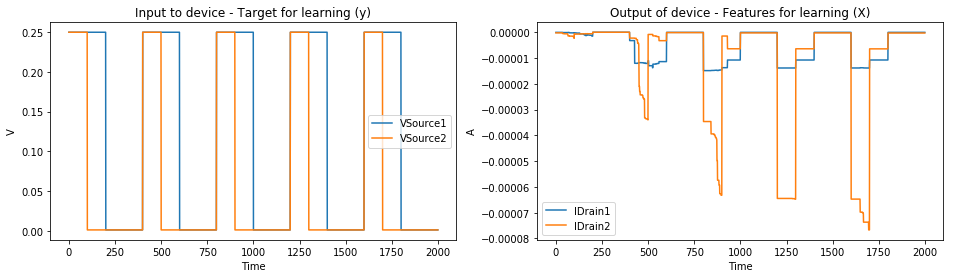

In [33]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1, label = 'VSource1'); axes[0].plot(VSource2, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1, label = 'IDrain1'); axes[1].plot(IDrain2, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

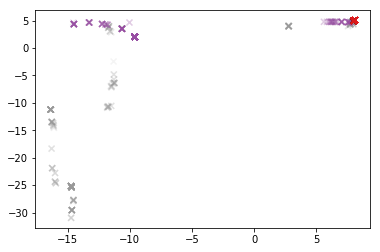

In [34]:
# Split the data
start_time = 0
X = np.hstack([IDrain1, IDrain2])[start_time:]
y = VSource1[start_time:].ravel()
y = (y == y.max())
y2 = VSource2[start_time:].ravel()
y2 = (y2 == y2.max()) * 2
y = y + y2

# scalar = StandardScaler()
# scalar = Normalizer()
# X = scalar.fit_transform(X)
# X = (X - X.mean(axis = 0)) / X.std(axis = 0)
X = (X - X.mean(axis = 0)) / X.std(axis = 0)
# X = (X - X.mean(axis = 1, keepdims=True)) / X.std(axis = 1, keepdims=True)
X = np.asarray(X) * 10

# sns.kdeplot(X[:,0][y], X[:,1][y])
# sns.kdeplot(X[:,0][~y], X[:,1][~y])

plt.scatter(X[:,0], X[:,1], c = y, marker = 'x', cmap = 'Set1', alpha = 0.1)

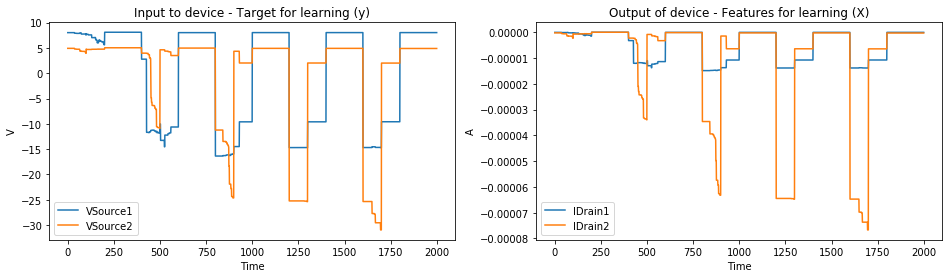

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(X[:,0], label = 'VSource1'); axes[0].plot(X[:,1], label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1, label = 'IDrain1'); axes[1].plot(IDrain2, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

In [45]:
# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 0)

clf = SVC(kernel = 'linear', C = 0.5, probability = True).fit(X_train, y_train)
# clf2 = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_pred = clf.predict(X_test)

# print('Test accuracy:', clf.score(X_test, y_test))

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [37]:
y_pred

In [38]:
# clf.predict_proba(X_test)

In [39]:
# Plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

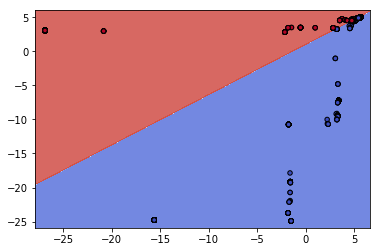

In [26]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [40]:
# Load the test data
filename = path + "Testing Simulation_3_ForPython.mat"
data_test = loadmat(filename)

In [41]:
start_time=0
X_test = np.hstack([data_test['IDrain1'].todense(), data_test['IDrain2'].todense()])[start_time:]
# X_test = scalar.transform(X_test)
X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)
# X_test = (X_test - X_test.mean(axis = 1)) / X_test.std(axis = 1)
X_test = np.asarray(X_test)

y = data_test['VSource1'][start_time:].ravel()
y = (y == y.max())
y2 = data_test['VSource2'][start_time:].ravel()
y2 = (y2 == y2.max()) * 2
y_test = y + y2

y_pred = clf.predict(X_test)

c:\program files\python35\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


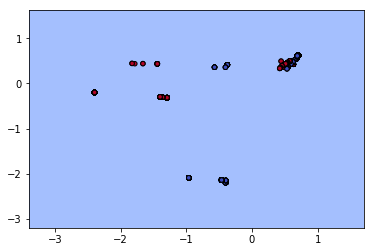

In [42]:
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

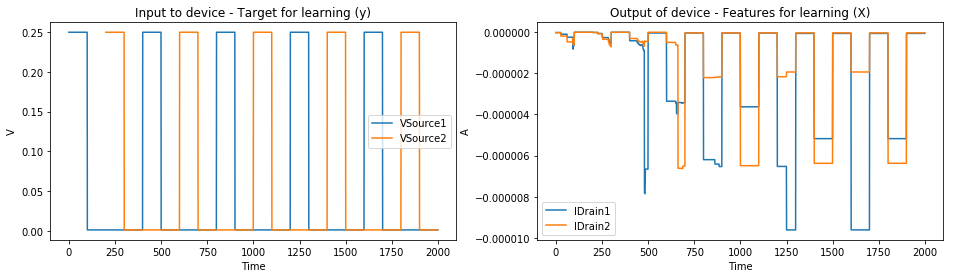

In [43]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(data_test['VSource1'], label = 'VSource1'); axes[0].plot(data_test['VSource2'], label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(data_test['IDrain1'].todense(), label = 'IDrain1'); axes[1].plot(data_test['IDrain2'].todense(), label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

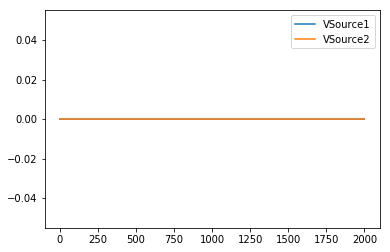

In [44]:
plt.plot(y_pred == 1, label = 'VSource1')
plt.plot(y_pred == 2, label = 'VSource2')
plt.legend()